# CP13. Exotic searches at ATLAS with NN Classification

In [93]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


## Exercise 1

Open the three background and one signal CSV files, and feed the data into four pandas.core.frame.DataFrame objects. One of them is significantly larger than others, and it will take much longer to unpack. You may want to use command os.path.getsize as a warning to your reader/self.
Carry out the usual sanity checks (pandas.core.frame.DataFrame.head(5)), and de- termine if data-cleaning is necessary (pandas.core.frame.DataFrame.dropna(inplace = True)).
Plot 1D distributions for the first 9 variables listed in Table 1, with one plot per variable and the distributions categorised by physics process (1 category for signal, 3 categories for background). Make sure the distributions are normalised (i.e. we are interested in shape differences here, not the overall integrated contributions), and that they are clearly distinct for the different processes (e.g. use different colours and non-filled histograms). You can use a loop over the input features to simplify the code, and you can ignore the units on the x-axis.

In [94]:
import os

**Checking the sizes of the files to "warn" that the last one might take a while to unpack and read into a dataframe:**

In [95]:
os.path.getsize("Diboson.csv")

33688877

In [96]:
os.path.getsize("Top.csv")

19556027

In [97]:
os.path.getsize("ggH1000.csv")

10883859

In [98]:
os.path.getsize("Zjets.csv")

1401889930

**This last one (Zjets.csv) us much larger in size**

In [99]:
# variables that we are interested in:
variables = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']

**Unpacking .csv files into panda dataframes:**

In [100]:
# Load datasets
data_diboson = pd.read_csv('Diboson.csv')

In [101]:
data_diboson = data_diboson[variables]

In [102]:
data_diboson.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0


In [103]:
data_diboson.dropna(inplace = True)

In [104]:
data_top = pd.read_csv("Top.csv")
data_top = data_top[variables]

In [105]:
data_top.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,38513.980,9003.888,253407.78,-1.195378,1.435712,35253.492,35612.324,51609.760,245723.92,0
1,34191.734,9425.637,256178.67,0.387434,2.403266,20311.205,38644.793,225038.800,351938.88,0
2,254871.310,17218.764,282584.72,-1.822714,1.336584,134715.500,244261.840,27090.697,1046120.90,0
3,84608.050,9801.820,205555.95,-1.725750,1.780693,69086.836,90045.625,57572.890,301995.70,0
4,50720.953,10932.975,256003.56,1.477704,3.398984,51731.508,52780.684,123177.900,376986.28,0


In [106]:
data_top.dropna(inplace = True)

In [107]:
data_gg = pd.read_csv("ggH1000.csv")
data_gg = data_gg[variables]

In [108]:
data_gg.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,320104.62,312638.44,480641.84,-0.851387,0.889354,87475.55,627990.80,44495.770,1063465.80,1
1,288589.78,129548.62,375352.78,1.041311,1.485706,90507.31,409780.94,34441.156,974210.75,1
2,228625.23,118590.28,555879.20,0.417858,1.219367,89765.85,344668.30,21625.379,996837.40,1
3,302502.84,233439.89,430646.20,0.438590,0.592705,92313.63,535629.06,21855.973,989655.56,1
4,224785.02,76205.98,244348.40,1.213717,0.724910,89451.92,296257.47,33677.380,993398.30,1


In [109]:
data_gg.dropna(inplace = True)

In [110]:
data_zjets = pd.read_csv("Zjets.csv")
data_zjets = data_zjets[variables]

In [111]:
data_zjets.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,76128.370,11973.011,210397.60,-1.329446,1.895164,95697.766,64252.690,177227.420,596020.44,0
1,40799.945,27624.867,226681.30,-0.429050,0.000000,90289.914,32506.705,10660.757,260357.19,0
2,57988.660,27102.590,547212.70,-0.543789,2.463149,92994.430,55287.625,655334.400,422698.44,0
3,55424.742,51873.030,200684.47,1.776149,2.081222,89607.580,63405.484,41489.973,302718.06,0
4,68312.220,28290.979,324990.97,-1.524169,2.321676,90199.480,47187.332,41731.630,461896.25,0


In [112]:
data_zjets.dropna(inplace = True)

**All the data sests seem to be fine and as expected so we can move on and plot the histograms for the variables**

**Histograms:**

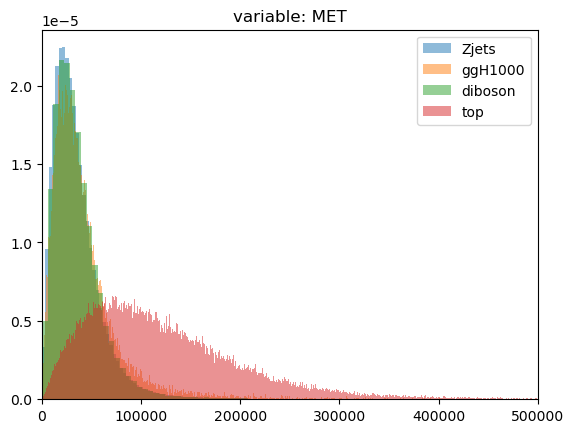

In [113]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["MET"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["MET"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["MET"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["MET"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: MET")
#plt.ylim((0,2))
plt.xlim(0,0.5e6)
plt.show()

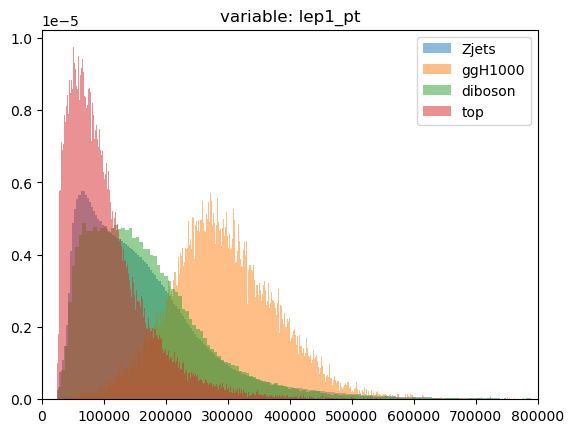

In [114]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["lep1_pt"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["lep1_pt"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["lep1_pt"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["lep1_pt"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: lep1_pt")
#plt.ylim((0,2))
plt.xlim(0,0.8e6)
plt.show()

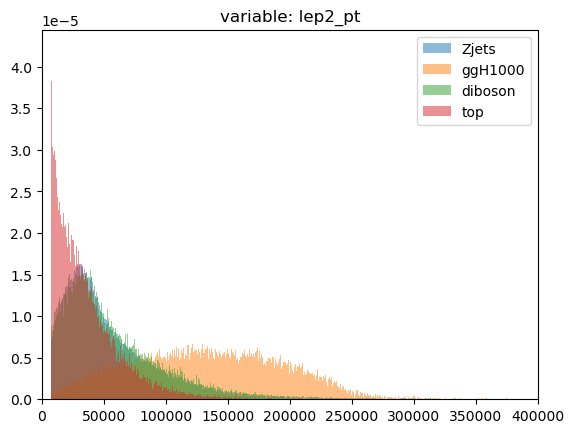

In [115]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["lep2_pt"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["lep2_pt"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["lep2_pt"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["lep2_pt"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: lep2_pt")
#plt.ylim((0,2))
plt.xlim(0,400000)
plt.show()

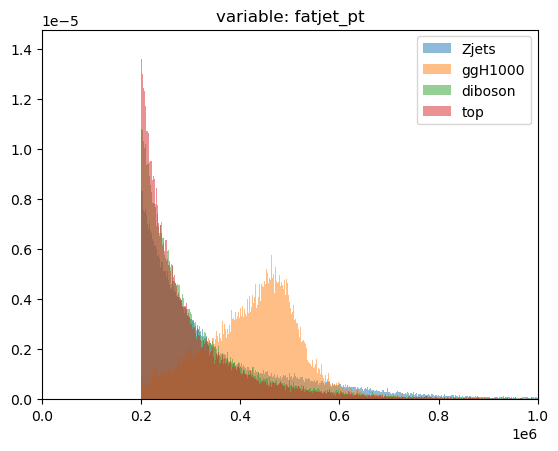

In [116]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["fatjet_pt"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["fatjet_pt"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["fatjet_pt"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["fatjet_pt"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: fatjet_pt")
#plt.ylim((0,2))
plt.xlim(0,1e6)
plt.show()

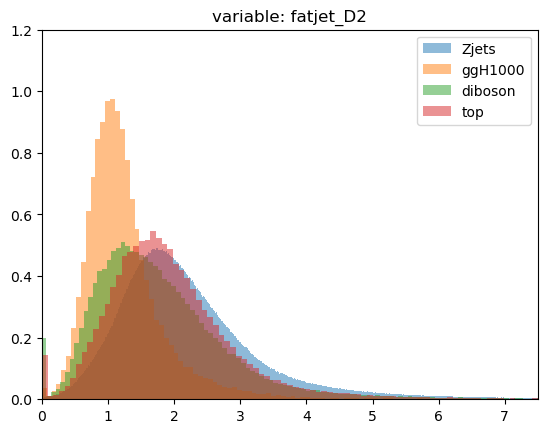

In [117]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["fatjet_D2"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["fatjet_D2"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["fatjet_D2"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["fatjet_D2"], bins = 5000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: fatjet_D2")
plt.ylim((0,1.2))
plt.xlim(0,7.5)
plt.show()

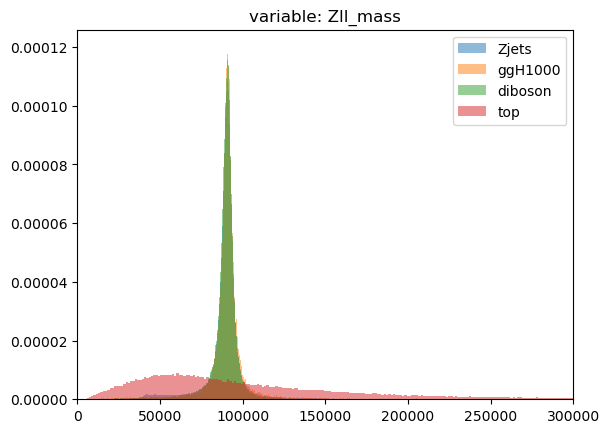

In [118]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["Zll_mass"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["Zll_mass"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["Zll_mass"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["Zll_mass"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: Zll_mass")
#plt.ylim((0,2))
plt.xlim(0,300000)
plt.show()

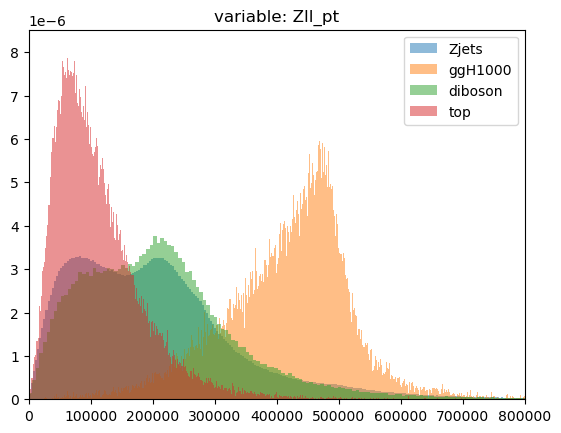

In [119]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["Zll_pt"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["Zll_pt"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["Zll_pt"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["Zll_pt"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: Zll_pt")
#plt.ylim((0,2))
plt.xlim(0,800000)
plt.show()

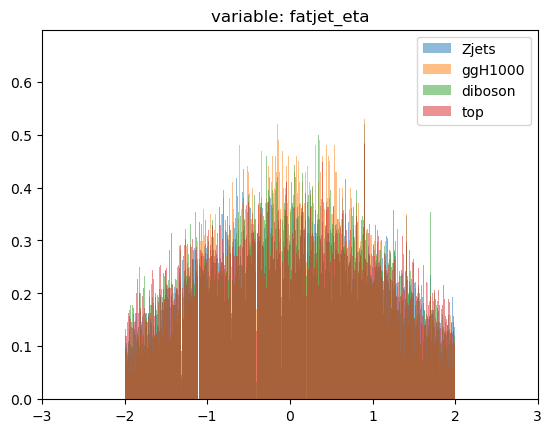

In [120]:
# using density = True to normalize the histograms as we only car about the shape
plt.hist(data_zjets["fatjet_eta"], bins = 100000, alpha=0.5, label='Zjets', density = True)
plt.hist(data_gg["fatjet_eta"], bins = 2000, alpha=0.5, label='ggH1000', density = True)
plt.hist(data_diboson["fatjet_eta"], bins = 5000,alpha=0.5, label='diboson', density = True)
plt.hist(data_top["fatjet_eta"], bins = 2000,alpha = 0.5, label = "top", density = True)
plt.legend(loc='upper right')
plt.title("variable: fatjet_eta")
#plt.ylim((0,2))
plt.xlim(-3,3)
plt.show()

After looking at all the histograms we can see which variables separate the signal from background, as an example the fatjet_pt separates it quite well, while the MET or fatjet_D2 doesn't do separate that well aparently.

## Exercise 2

(a) (1 point) Put together all background samples to produce one “mega” DataFrame with method pandas.core.frame.DataFrame.concat. You probably also want to be using the ignore index=True option.
We want to shuffle the contents of the new DataFrame, as it currently contains ordered events from different background processes, which is unnatural. Use methods sklearn.utils.shuffle and DataFrame.reset index(drop=True). Make sure to run this with a fixed random seed, as per good practice for reproducibility of your results.
Create a training dataset that contains equal numbers of signal and background events.
Remember that in the original dataframes the number of background events is much 
larger than the number of signal events. Create a 50-50 admixture sample with twice the number of signal events . Use the previously discussed concat and shuffle methods.

**Processing the background data set:**

In [121]:
# putting all the background data in one data frame
data_bgn = pd.concat([data_diboson, data_top, data_zjets], ignore_index = True)

In [122]:
data_bgn.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0


In [123]:
seed = 88 # fixed random seed for reproducibility
data_bgn = sklearn.utils.shuffle(data_bgn,random_state=seed)
data_bgn = data_bgn.reset_index(drop=True)

In [124]:
data_bgn.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,128399.390,57248.080,204471.30,1.869455,1.713927,91243.210,171047.840,5447.1465,443189.28,0
1,167766.950,83967.910,254801.10,1.145984,1.383840,90300.260,250592.080,28179.3100,541744.60,0
2,425242.600,58760.406,508434.03,-0.996796,2.766357,91386.000,476678.900,11114.8300,1203251.80,0
3,132809.580,95227.030,367817.94,-0.502274,2.715304,89529.350,221309.580,43966.7100,997361.40,0
4,35751.137,31533.430,294575.80,1.029355,2.122670,78424.836,62922.188,25825.3960,402615.50,0


**Creating trainning dataset:**

In [125]:
num = data_gg.shape[0]

In [126]:
x_train = pd.concat([data_gg, data_bgn[:num]],ignore_index=True) 
x_train = sklearn.utils.shuffle(x_train,random_state=seed)
x_train = x_train.reset_index(drop=True)

In [127]:
x_train.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,103541.695,29452.385,482256.40,-1.299549,2.224841,22574.40,132889.060,390700.220,574597.20,0
1,132817.310,20785.970,291419.60,-1.682815,3.434477,91722.49,123227.555,37292.170,423682.10,0
2,276477.220,211596.810,520546.78,-1.095818,1.408673,88048.73,480734.800,36330.203,1019253.40,1
3,75937.734,45176.630,317231.30,-1.067637,1.482891,91415.44,117416.016,12745.249,467934.34,0
4,403866.620,251186.660,571685.90,1.447178,2.139603,93091.51,652314.200,55396.504,1251873.90,1


In [128]:
x_train.shape

(100026, 10)

**as wanted!!**

(b) (1 point) Create a new dataframe containing only the 8 input and 1 output features of interest. Make 2D scatter plots for each combination pair of the 8 input features. Choose a different colour for signal and background (do this by creating a wtype = [’Background’, ’Signal’] object with the labels of the possible N classes = 2 categories. You can either write your own code, or recycle function dt utils.featureplot that we used in a previous NN checkpoint.

In [129]:
# ignoring reco_zv_mass:
input_var = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET']
in_out_var = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET', "isSignal"]

In [130]:
# have the xt_train data set for the input and ouput variables (in_out_var)
new_xtrain = x_train[in_out_var]

In [131]:
# deciding colours for signal / background
colour_scheme = np.where(new_xtrain['isSignal']==1,'m','g')

**Now we have to create plots correlating all the variables, easiest way to do this is with for loops:**

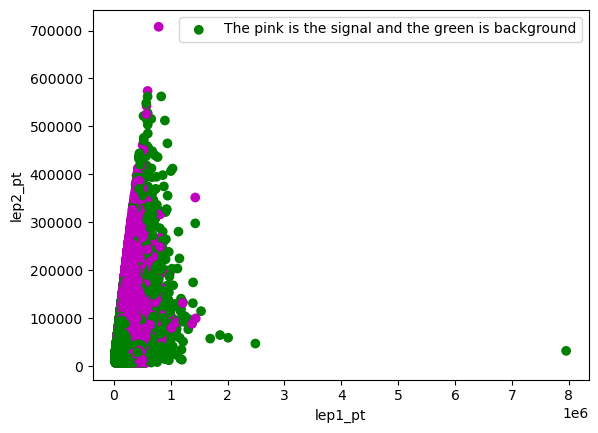

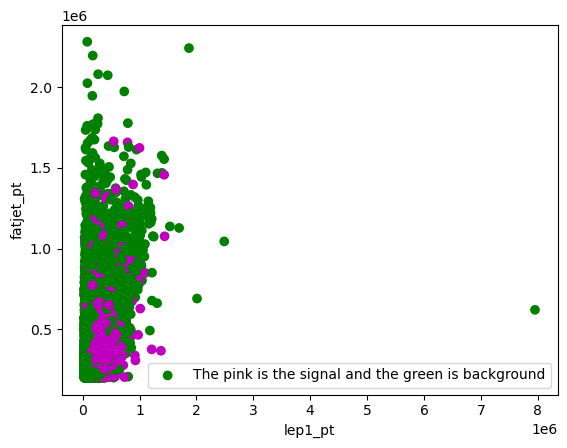

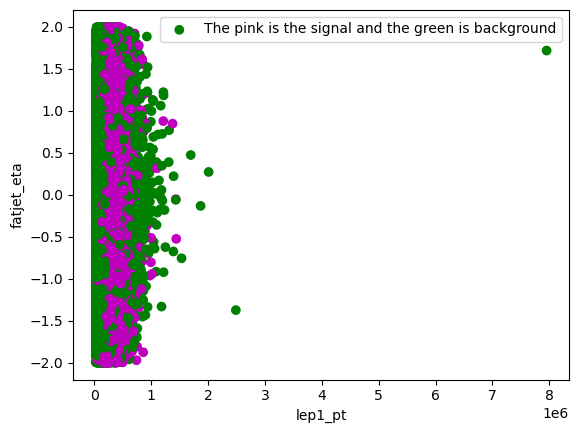

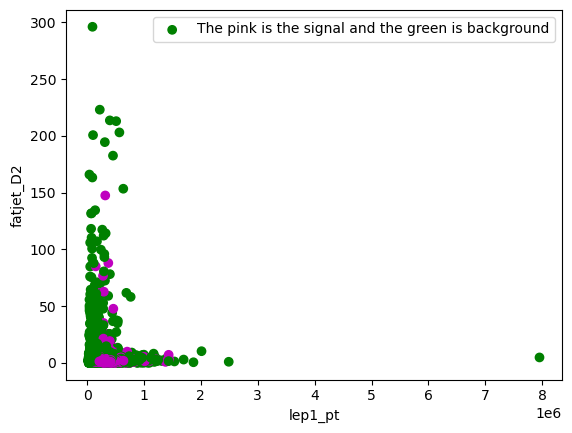

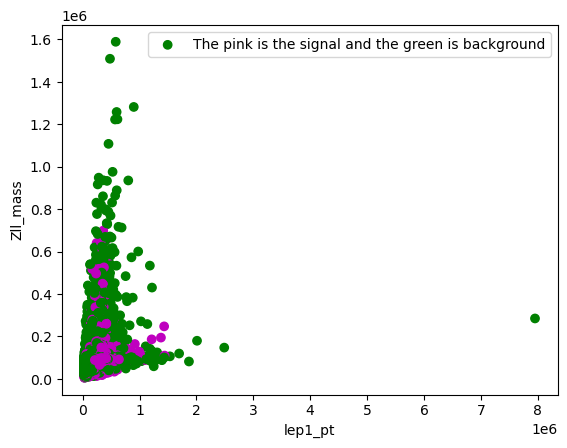

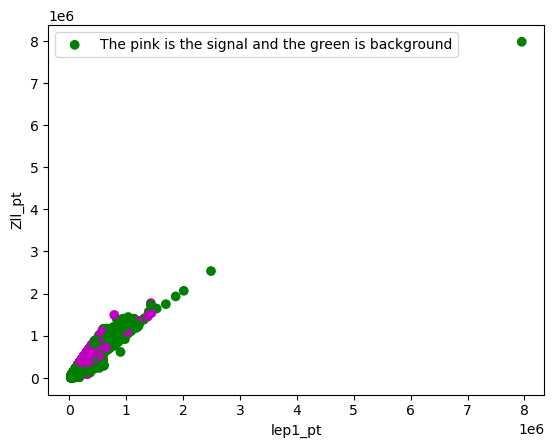

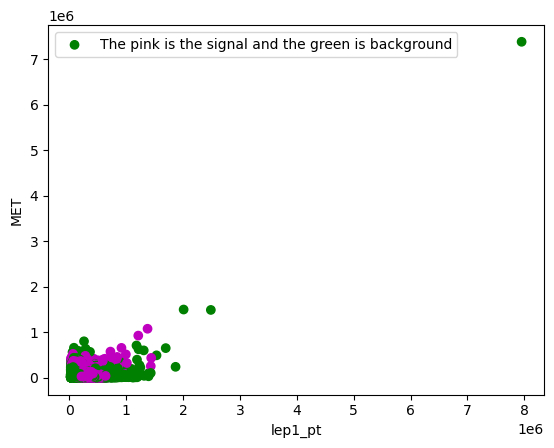

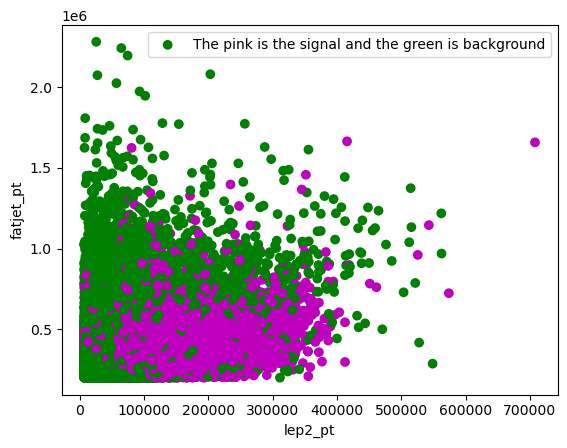

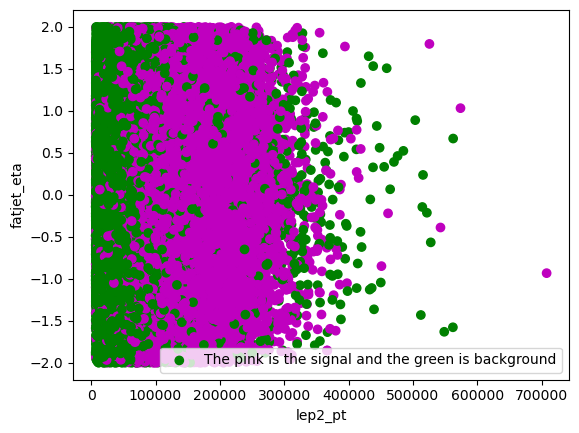

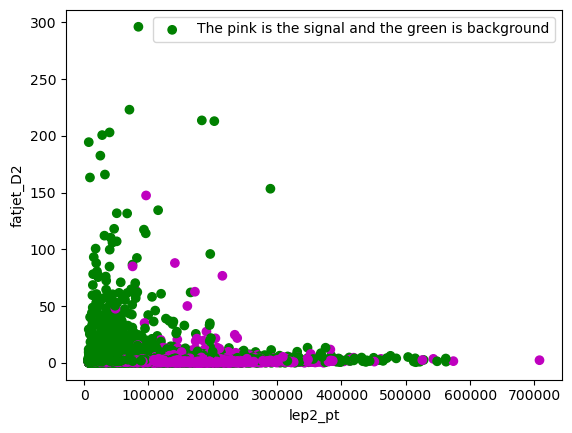

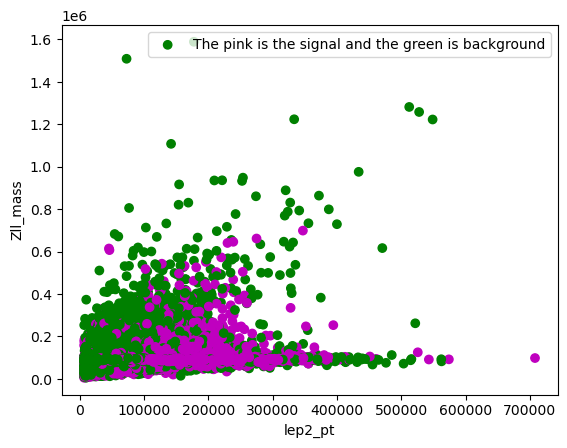

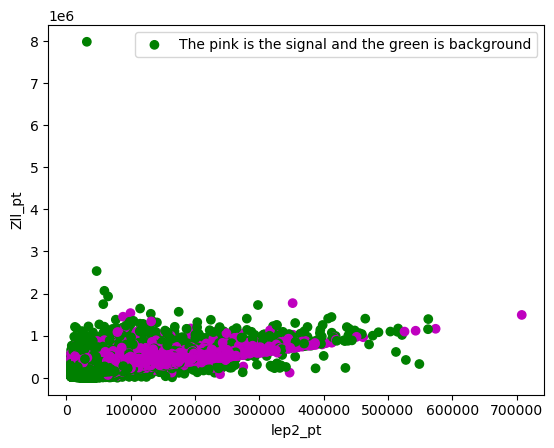

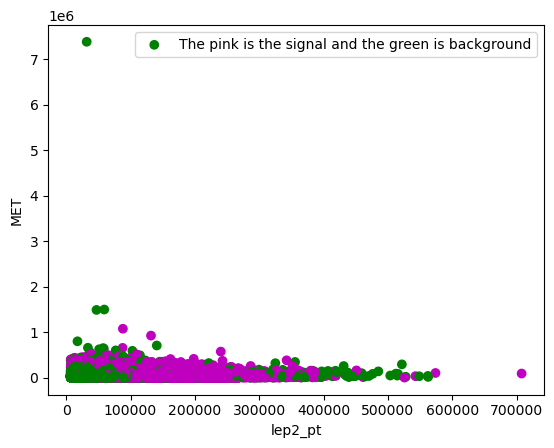

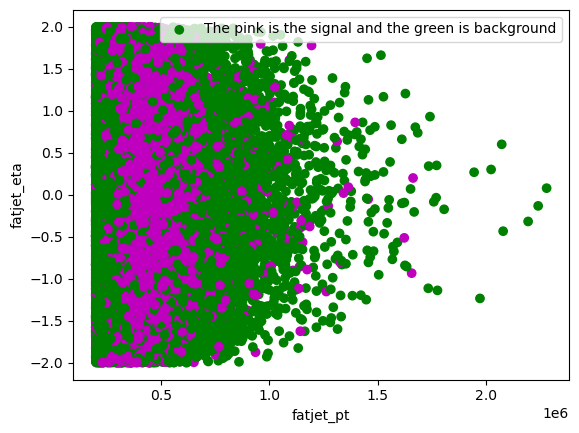

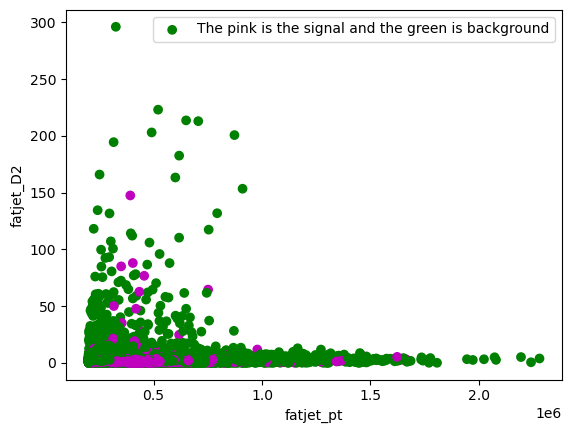

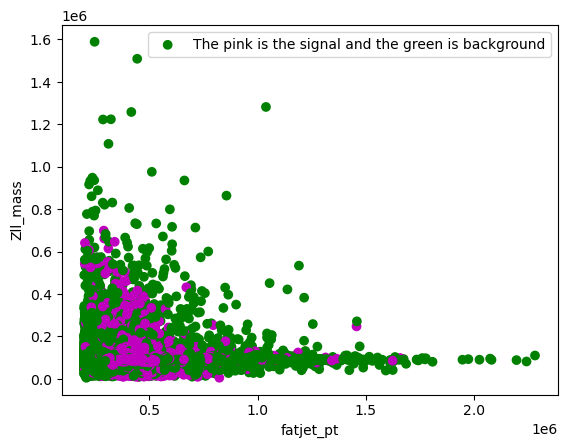

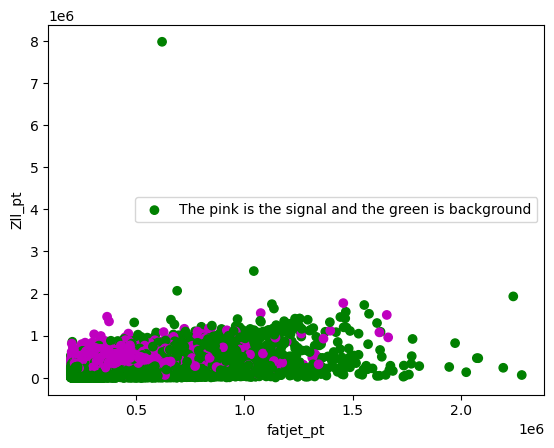

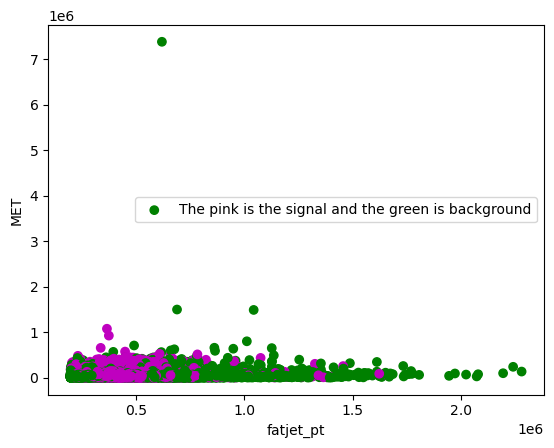

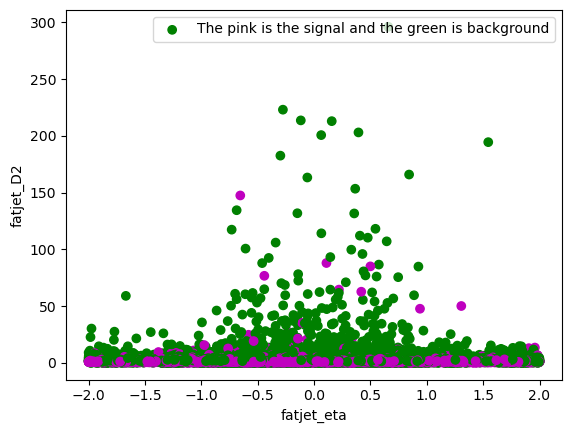

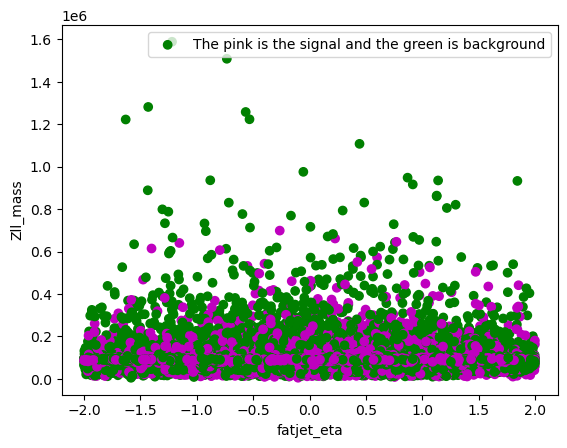

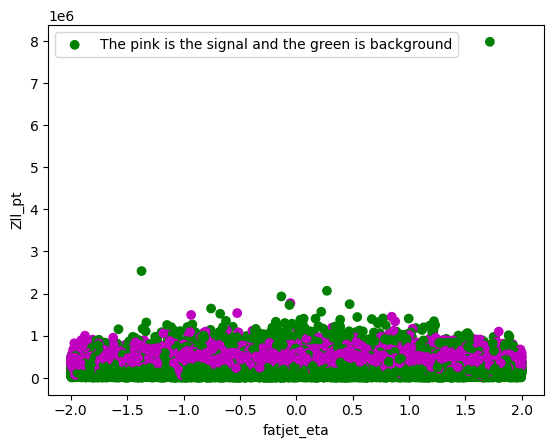

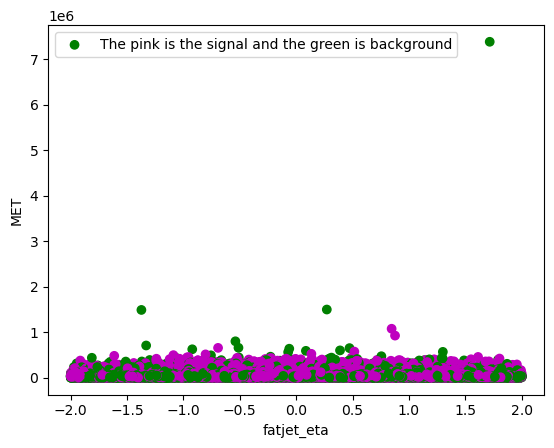

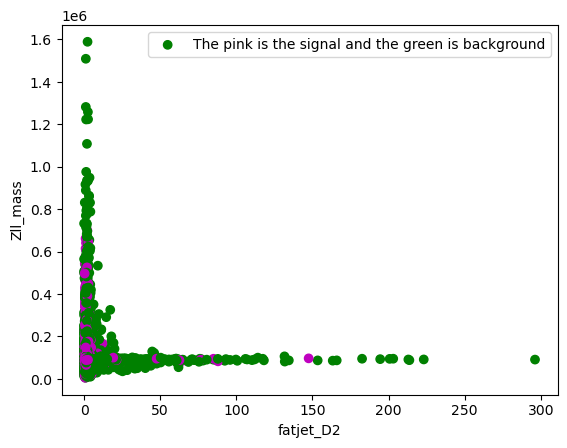

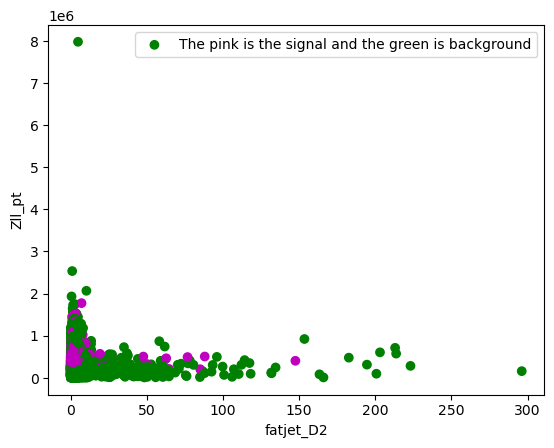

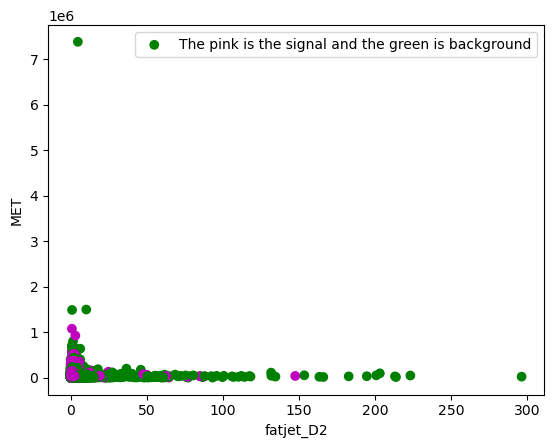

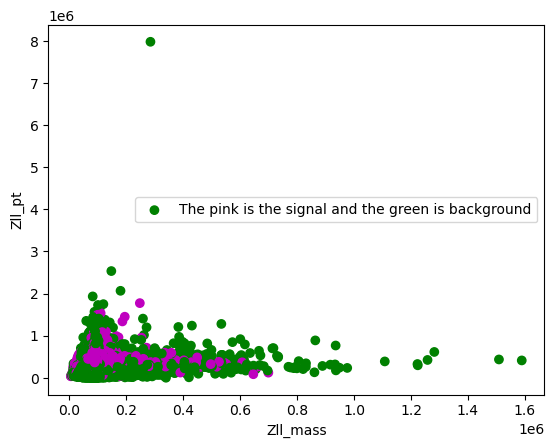

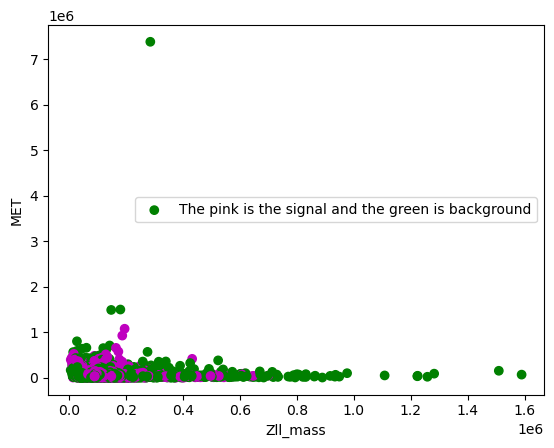

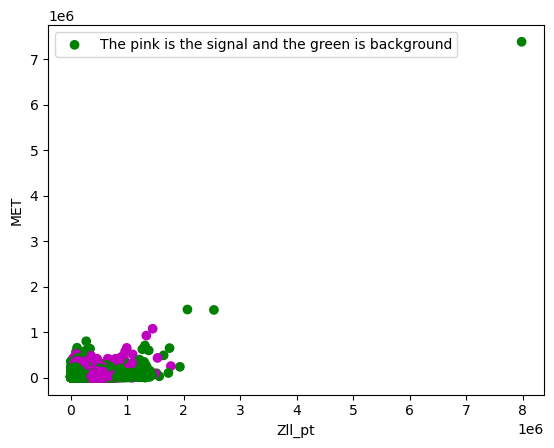

In [132]:
for i in range(8): # 8 is the number of different input variables
    for j in range(i+1,8): 
        # deciding colours for signal / background
        #colour_scheme = np.where(new_xtrain['isSignal']==1,'r','g')
        plt.scatter(new_xtrain[input_var[i]],new_xtrain[input_var[j]],color=colour_scheme, label="The pink is the signal and the green is background")
        plt.xlabel(input_var[i])
        plt.ylabel(input_var[j])
        plt.legend()
        plt.show() 

## Exercise 3

We start by performing input-feature scaling. We then split the dataset into training (70%) and test (30%) subsets:

In [133]:
from sklearn import model_selection , preprocessing 
sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(new_xtrain[input_var])
# set random seed
Answer_to_all_questions = 42
# train -test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, new_xtrain["isSignal"], test_size=0.3, random_state=Answer_to_all_questions)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(70018, 8) (70018,) (30008, 8) (30008,)


## Exercise 4

(a) (2 points) Write a function that can create flexible NN models.

In [134]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout

In [135]:
num_outputs = 1 

In [136]:
def my_model(num_inputs , num_nodes , extra_depth): # create model
    model = Sequential ()
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer='normal', activation='relu')) 
    model.add(Dropout(0.2))
    for i in range(extra_depth):
        # code up the extra layers here
        model.add(Dense(num_nodes,input_dim=num_inputs*5,kernel_initializer = 'normal',activation='relu'))

    model.add(Dense(num_outputs , activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model


Try running the NN with a batch size of 500, 50 epochs, 20 nodes per layer, and extra depth = 1 as a starting point.

In [137]:
batch_size = 500
n_epochs = 50
num_nodes = 20 # per layer
extra_depth = 1 
number_inputs = 8

In [138]:
# compiled model
model = my_model(number_inputs,num_nodes,extra_depth)

Put the result of the fit method call into a History object:

In [139]:

history = model.fit(train_data , train_target , batch_size=batch_size , epochs=n_epochs , verbose=1, validation_data=(test_data , test_target))

Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5777 - accuracy: 0.8204 - val_loss: 0.3370 - val_accuracy: 0.8684
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8715 - val_loss: 0.2993 - val_accuracy: 0.8785
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8773 - val_loss: 0.2905 - val_accuracy: 0.8818
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8788 - val_loss: 0.2876 - val_accuracy: 0.8831
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8803 - val_loss: 0.2857 - val_accuracy: 0.8843
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8795 - val_loss: 0.2843 - val_accuracy: 0.8851
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8809 - val_loss: 0.2827 - val_accuracy: 0.8854
Epoch 

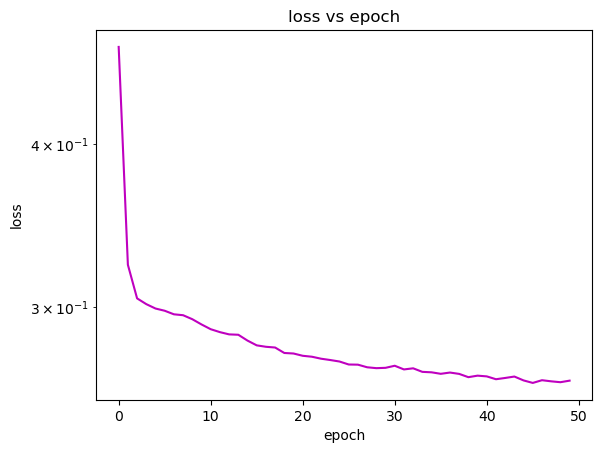

In [140]:
plt.plot(history.history['loss'], "m")
plt.title('loss vs epoch')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale('log')
plt.show()


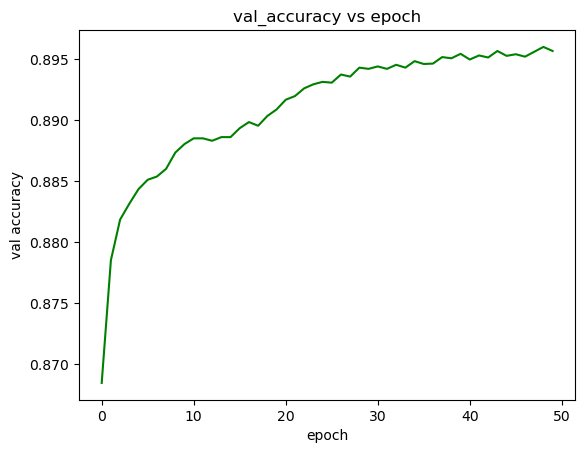

In [141]:
plt.plot(history.history['val_accuracy'], "g")
plt.title('val_accuracy vs epoch')
plt.xlabel("epoch")
plt.ylabel("val accuracy")
plt.show()

**The plots look ok so far (loss going down and val_accuracy going up)**

## Exercise 5

Having to find the best architecture by varying the numbers of layers and nodes, or the batch size and number of epochs is quite tedious. We will implement a callback hook that can automate the procedure for us, and exit the optimisation when the classification converges:

Try using this new method after you expand the set of input features to also include variable reco zv mass. Feel free to experiment with the architecture parameters. The goal is to achieve an accuracy (val accuracy) of 95%. Plot the loss-function and NN- accuracy as a function of the epoch for the best classification method.

**Do the same thing as before, but know with one more input variabel (the "reco_zv_mass"):**

In [142]:
input_var2 = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET', 'reco_zv_mass']

In [143]:
input_data = sc.fit_transform(x_train[input_var2])
# set random seed
Answer_to_all_questions = 42
# train -test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, new_xtrain["isSignal"], test_size=0.3, random_state=Answer_to_all_questions)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(70018, 9) (70018,) (30008, 9) (30008,)


In [144]:
batch_size = 500
n_epochs = 80
num_nodes = 20 # per layer
extra_depth = 1 
number_inputs = 9

In [145]:
# compiled model
model2 = my_model(number_inputs,num_nodes,extra_depth)

In [146]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
callbacks_ = [
# if we don’t have an increase of the accuracy for 10 epochs, terminate training. 
EarlyStopping(verbose=True, patience=10, monitor="val_accuracy"),
# Always make sure that we’re saving the model weights with the best accuracy. 
ModelCheckpoint("model.h5",monitor="val_accuracy", save_best_only=True, mode="max")]

history2 = model2.fit(train_data , train_target , batch_size=batch_size , epochs= n_epochs , verbose=1, validation_data=(test_data , test_target), callbacks=callbacks_)

Epoch 1/80
141/141 [==============================] - 1s 4ms/step - loss: 0.5999 - accuracy: 0.7912 - val_loss: 0.3108 - val_accuracy: 0.8823
Epoch 2/80
141/141 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8908 - val_loss: 0.2304 - val_accuracy: 0.9154
Epoch 3/80
141/141 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9140 - val_loss: 0.2037 - val_accuracy: 0.9291
Epoch 4/80
141/141 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9229 - val_loss: 0.1937 - val_accuracy: 0.9311
Epoch 5/80
141/141 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9261 - val_loss: 0.1884 - val_accuracy: 0.9340
Epoch 6/80
141/141 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9262 - val_loss: 0.1851 - val_accuracy: 0.9349
Epoch 7/80
141/141 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9308 - val_loss: 0.1829 - val_accuracy: 0.9355
Epoch 

**The loss is smaller than with the previous model and the accuracy is higher so it works better**

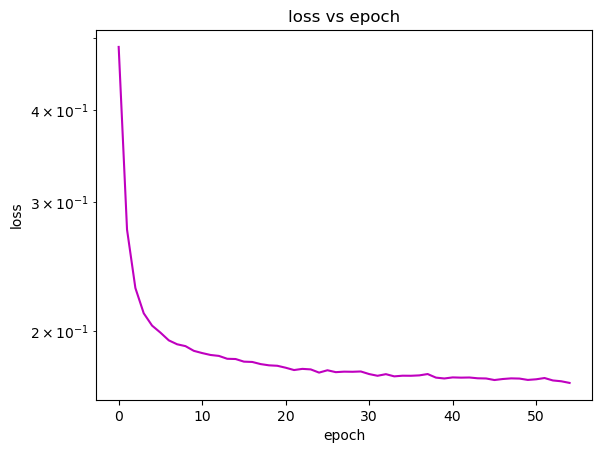

In [147]:
plt.plot(history2.history['loss'], "m")
plt.title('loss vs epoch')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale('log')
plt.show()

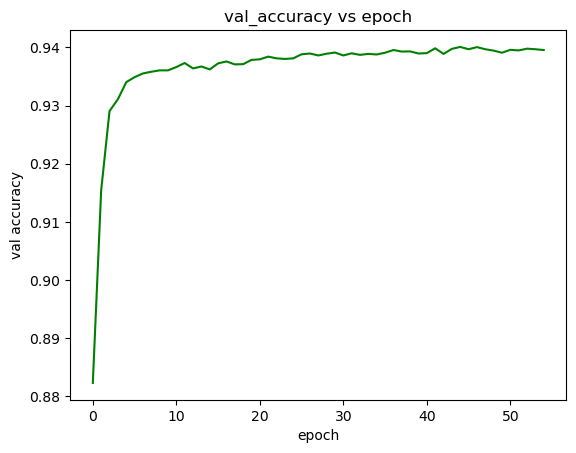

In [148]:
plt.plot(history2.history['val_accuracy'], "g")
plt.title('val_accuracy vs epoch')
plt.xlabel("epoch")
plt.ylabel("val accuracy")
plt.show()

## Exercise 6

We will now try to visualise the results of the NN classifier.
Use method keras.models.Model.predict to get the predicted categories for test data. Notice that the output is not binary, but corresponds to a probability. Use a simple model (e.g. predicted = (predict test target >0.5)) to turn the output into a binary decision. Use sklearn.metrics.confusion matrix and nn utils.heatmap to plot the “confusion matrix” on a 2 × 2 grid.
A more advanced way of showing the NN classifier performance is by producing a ROC curve. Use sklearn.metrics.roc curve to get the False Positive Rate (i.e. effectively: background efficiency) and True Positive Rate (i.e. effectively: signal efficiency). Plot the ROC curve. What would you say the optimal performance point is?

In [149]:
predicted = model2.predict(test_data)

**Confusion matrix**

In [150]:
# rounding them because other wise you can't get the confusion matrix
pred = np.round(predicted, 0)

In [151]:
cmat = confusion_matrix(test_target,pred,normalize='true')

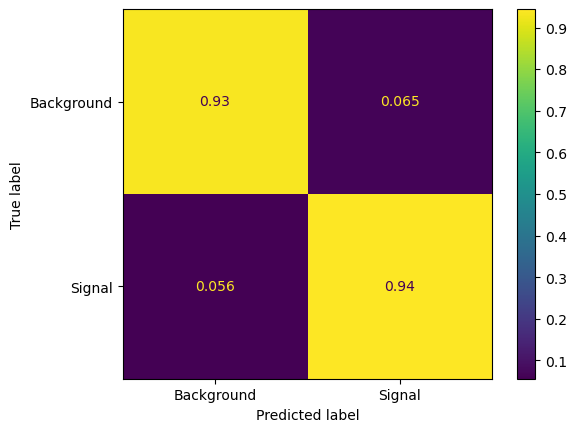

In [152]:

cmatplot = ConfusionMatrixDisplay(confusion_matrix=cmat,display_labels=['Background','Signal'])
cmatplot.plot()
plt.show()

**It looks good!**

**To do the ROC curve I just use the sklearn.metrics.roc curve**

In [153]:
from sklearn.metrics import roc_curve

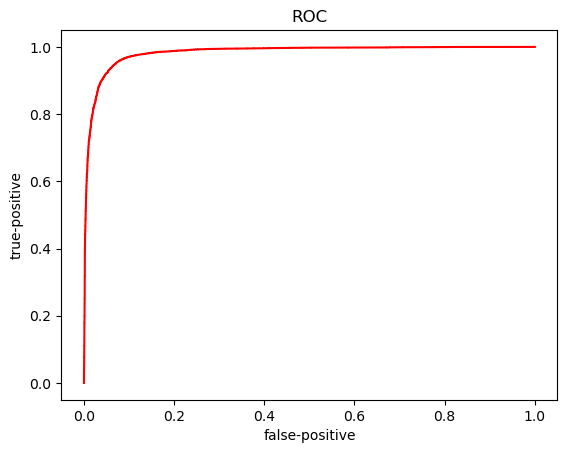

In [154]:
fpr, tpr, thresholds = roc_curve(test_target,model2.predict(test_data))
plt.plot(fpr,tpr, c = "r")
plt.xlabel('false-positive')
plt.ylabel("true-positive")
plt.title("ROC")
plt.show()

**After looking at reference [5] the optimum value would be at the top left of the curve where it is true positive rate is higher**